### Lab 3 - Question 2
KINDRACHUK
11675519

> a) Using Python, compute the condition number for
the matrix $A_1$ from Equation [Differential System Matrix](#lab3:eq:dir-system) for several values of $N$
between 5 and 50. ( **Hint:** This will be much easier if you write a
small Python function that outputs the matrix $A$ for a given value of
$N$.)

<font color = 'red'> See code below </font>

> b\) Can you conjecture how the condition number of $A_1$ depends on $N$?

<font color = 'red'> The condition number of A1 increases with N, proportionally to $x^2$</font>

> c\) Another way to write the system of equations is to substitute the
boundary conditions into the equations, and thereby reduce size of the
problem to one of $N-1$ equations in $N-1$ unknowns. The corresponding
matrix is simply the $N-1$ by $N-1$ submatrix of $A_1$
from Equation [Differential System Matrix](#lab3:eq:dir-system) $$A_2 = \left[
      \begin{array}{ccccccc}
        -2 &  1 &  0 & \dots & && 0 \\
        1 & -2 &  1 & 0 & \dots & & \\
        0 & 1  & -2 & 1 & 0 & \dots &  \\
        & & & & & & \\
        \vdots & & \ddots & \ddots& \ddots & \ddots & \vdots\\
        & & & & & & 0 \\
        & & \dots & 0 & 1 & -2 & 1 \\
        0&  & &\dots & 0 & 1 & -2 \\
      \end{array}
    \right]
$$ Does this change in the matrix make a significant difference in the
condition number?

<font color = 'red'> The condition number of A2 is somewhat higher than A1, but not by much, and is more pronounced at higher N. See below. </font>

### Problem 2 Part A)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


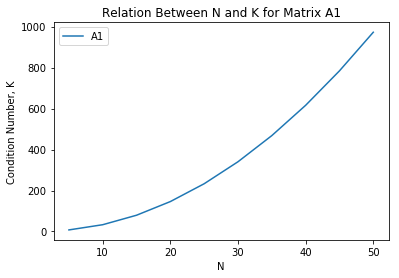

In [8]:
#Problem 2 Part A
# Relation between N and K for Matrix A1

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import numpy.matlib
import matplotlib.pyplot as plt

N = 5
Narr = []
Carr = []

for N in range(5,55,5):
    k = np.array([np.ones(N-1),-2*np.ones(N),np.ones(N-1)])
    offset = [-1,0,1]
    A = sp.diags(k,offset).toarray()
    A[0,0]=1
    A[0,1]=0
    A[N-1,N-1]=1
    A[N-1,N-2]=0
    cond = np.linalg.cond(A)
    Narr.append(N)
    Carr.append(cond)

print(A)
    
plt.plot(Narr,Carr, label="A1")
plt.xlabel('N')
plt.ylabel('Condition Number, K')
plt.title('Relation Between N and K for Matrix A1')
plt.legend()
plt.show()

## Problem 2 Part C)

Matrix A1
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
Matrix A2
[[-2.  1.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  1. -2.]]
Differences are:  [1.8282301401710717, 6.7896467779819076, 11.151346555192873, 15.358052564223556, 19.502542323940617, 23.616063924699006, 27.711998056448977, 31.797005120530912, 35.874765874982813, 39.947477472383071]


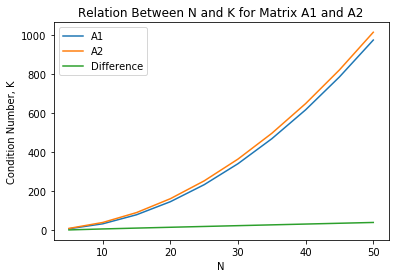

In [12]:
#Test for loop to plot results

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import numpy.matlib
import matplotlib.pyplot as plt

N = 5
Narr = []
Carr = []
Narr2 = []
Carr2 = []
condDiff = []
condPerc = []

for N in range(5,55,5):
    k = np.array([np.ones(N-1),-2*np.ones(N),np.ones(N-1)])
    offset = [-1,0,1]
    A = sp.diags(k,offset).toarray()
    A[0,0]=1
    A[0,1]=0
    A[N-1,N-1]=1
    A[N-1,N-2]=0
    cond = np.linalg.cond(A)
    Narr.append(N)
    Carr.append(cond)
    k2 = np.array([np.ones(N-2),-2*np.ones(N-1),np.ones(N-2)])
    offset2 = [-1,0,1]
    A2 = sp.diags(k2,offset2).toarray()
    cond2 = np.linalg.cond(A2)
    Narr2.append(N)
    Carr2.append(cond2)
    condDiff.append(cond2-cond)
    condPerc.append((cond2-cond)/cond)

print('Matrix A1')
print(A)
print('Matrix A2')
print(A2)

print('Differences are: ', condDiff)

plt.plot(Narr,Carr, label="A1")
plt.plot(Narr2,Carr2, label="A2")
plt.plot(Narr,condDiff, label="Difference")
plt.xlabel('N')
plt.ylabel('Condition Number, K')
plt.title('Relation Between N and K for Matrix A1 and A2')
plt.legend()
plt.show()
